# Chapter 8: Statistical Tests

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Helper functions imported from textbook
def p_rtail(sampdist,tstat): 
    points = sns.kdeplot(sampdist).get_lines()[0].get_data() # get x and y values from plot 
    x = points[0] 
    y = points[1] 
    plt.fill_between(x,y, where = x > tstat, color='r') 
    plt.fill_between(x,y, where = x <= tstat, color='g') 
    plt.show() 
    pvalue = np.sum(sampdist < tstat) / len(sampdist) 
    return pvalue 

def p_ltail(sampdist,tstat): 
    points = sns.kdeplot(sampdist).get_lines()[0].get_data() 
    x = points[0] 
    y = points[1] 
    plt.fill_between(x,y, where = x < tstat, color='r') 
    plt.fill_between(x,y, where = x >= tstat, color='g') 
    plt.show() 
    pvalue = np.sum(sampdist > tstat) / len(sampdist) 

    return pvalue 

def p_2tail(sampdist,tstat):
    points = sns.kdeplot(sampdist).get_lines()[0].get_data() 
    hyp = np.mean(sampdist) 
    cutoff1 = hyp - np.abs(hyp - tstat) 
    cutoff2 = hyp + np.abs(hyp - tstat) 
    x = points[0] 
    y = points[1] 
    plt.fill_between(x,y, where = (x < cutoff1) | (x > cutoff2), color='r') 
    plt.fill_between(x,y, where = (x >= cutoff1) & (x <= cutoff2), color='g') 
    plt.show() 
    pvalue = np.sum((sampdist < cutoff1) | (sampdist > cutoff2)) / len(sampdist) 
    return pvalue 

In [21]:
#Health.csv moved into the folder for consistency in file input. Edit the file path as needed.
health = pd.read_csv("Health.csv")
health.head(5)

,ofp,ofnp,opp,opnp,emr,hosp,exclhlth,poorhlth,numchron,adldiff,...,west,age,black,male,married,school,faminc,employed,privins,medicaid
0,5,0,0,0,0,1,0,0,2,0,...,0,6.9,1,1,1,6,2.8810,1,1,0
1,1,0,2,0,2,0,0,0,2,0,...,0,7.4,0,0,1,10,2.7478,0,1,0
2,13,0,0,0,3,3,0,1,4,1,...,0,6.6,1,0,0,10,0.6532,0,0,1
3,16,0,5,0,1,1,0,1,2,1,...,0,7.6,0,1,1,3,0.6588,0,1,0
4,3,0,0,0,0,0,0,0,2,1,...,0,7.9,0,0,1,6,0.6588,0,1,0


1. There is a variable called faminc, which indicates the income of the family. Conduct a test for the median value of 1.75.  

1. Null Hypothesis :the median value is 1.75
2.  Since the family income values are numerical, we will assume they follow N(μ,σ) 
Since a normal distribution is always symmetric about the mean, its median value will be the same as its mean.

actual median : 
1.69815


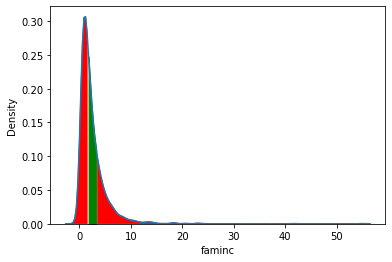

0.7476168860644575

In [14]:
median = np.median(health.faminc)
print("actual median : ")
print(median)
p_2tail(health.faminc, 1.75)

p-value is largely above the threshold of 0.05, so the null hypothesis cannot be rejected. 

2. There is a variable called age.  Assuming this follows an exponential distribution, test the hypothesis that the mean value of age is 7.5.  

Null Hypothesis :the meean value is 7.5

Since the age values are numerical, we will assume they follow N(μ,σ) Since a normal distribution is always symmetric about the mean, its median value will be the same as its mean.

actual mean: 
7.4024058102587125


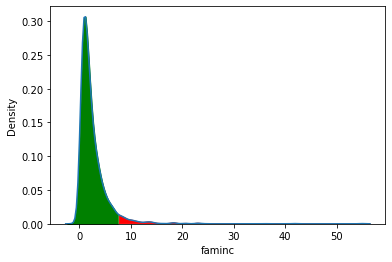

0.043349977303676804

In [15]:
mean = np.mean(health.age)
print("actual mean: ")
print(mean)
p_2tail(health.faminc, 7.5)

p-value is slightly below the threshold of 0.05, so the null hypothesis can be rejected. 

3. There are two variables named males and exclhlth. The first one refers to gender and the second to the health condition. Both variables have only two values 0 or 1. Conduct (a chi-square) test to see if these two variables are related. Note that the null hypothesis is that there is no relationship between the two. 

Null Hypothesis : there is no relationship between gender and health variables.

In [24]:
#make a contingency table
contigency= pd.crosstab(health['male'], health['exclhlth']) 
contigency

exclhlth,0,1
male,,
0,2435,193
1,1628,150


In [30]:
from scipy.stats import chi2_contingency

c, p, dof, expected = chi2_contingency(contigency) 
print(p)

0.20390566840673588


The two variables tend to be related, as the value is very low (0.21)

In [18]:
#UsedCars2017 csv also inserted into the directory.
cars =  pd.read_csv("UsedCars2017.csv")

In [19]:
cars.head(5)

,Price,Age,Mileage,MPG,KBB Price,CR Reliability Score
0,11858.0,6.0,69.7,34.0,10600.0,0.80
1,3092.0,17.0,166.7,21.0,2400.0,0.67
2,14300.0,4.0,42.3,35.0,11100.0,0.75
3,10942.0,6.0,84.4,28.0,8500.0,0.92
4,12968.0,5.0,56.6,27.0,10000.0,0.56


4. Develop a test to evaluate the hypothesis that the population mean Price is the same as the population median Price. Hint: Assume a normal distribution for the population. 

In [32]:
#Null hypothesis : The mean and median are same
#Since a normal distribution is always symmetric about the mean, its median value will be the same as its mean.
#We will go for a normality test.
mean = np.mean(cars.Price)
median = np.median(cars.Price)
#in terms of raw values, median is not same as the mean

7095.789975649351
5671.5


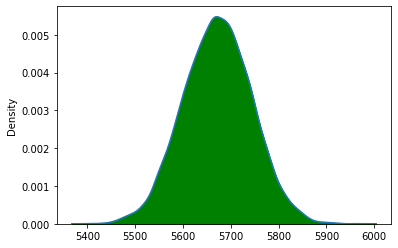

0.0

In [52]:
np.random.seed(87654321) 
sampsize = len(cars) 


def f1(): 
    s1 = np.random.normal(size=sampsize, loc=median, scale=cars.std()['Price']) 
    return np.mean(s1) 

sampdist = [f1() for _ in range(10000)] 
tstat = cars.mean()['Price'] 

p_2tail(sampdist,tstat) 

5. Develop a test to evaluate the hypothesis that the population mean Price is 1.4 times the population standard deviation of Price. Hint: Assume a normal distribution for the population with standard deviation to be the same as the sample and the mean is 1.4 times the sample standard deviation. 

In [50]:
stdev = np.std(cars.Price)
print(stdev)
print(stdev*1.4)

5001.793147001848
7002.510405802587


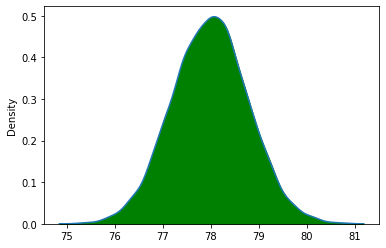

0.0

In [53]:
np.random.seed(87654321) 


def f1(): 

    mu = cars.mean()['Price'] 
    s1 = np.random.normal(size=sampsize, loc=mu*1.4, scale=78) 
    #mean is 1.4 of stdev

    return np.std(s1) 

sampdist = [f1() for _ in range(10000)] 
tstat = cars.mean()['Price'] 

p_2tail(sampdist,tstat) 

6. Develop a test to evaluate the hypothesis that the population correlation between Age and Mileage is 0.9. 

In [ ]:
#helper function for scaling
def scale(x): 
    return(x - np.mean(x)) / np.std(x) 

 
age1 = scale(cars['Age']) 
mileage1 = scale(cars['Mileage'])

In [ ]:
np.random.seed(87654321) 

S = np.array([[1,0.9],[09.,1]]) 
M = np.array([0,0])


sampsize = len(cars) 

def f1(): 

    x = np.random.multivariate_normal(mean=M, cov=S, size=sampsize) 

    return(np.corrcoef(x[:,0], x[:,1])[0,1]) 

sampdist = [f1() for _ in range(10000)] 